# Infant eating and sleeping patterns

I have a friend who uses an app to keep track of her infant's eating and sleeping schedule.  Because she is breastfeeding, the baby's eating habits can be unpredictable, but in principle, keeping track of the data could help identify patterns of behavior (haha, as if babies could be predicted!)

I have the exported data from the app as a CSV of timestamped periods of eating and sleeping, including whether the baby nursed on the left/right side or ate from a bottle, and if so, how many oz of milk were used.  I'm hoping to use this data to answer questions of interest like:
* Does the baby tends to nap longer immediately following a feeding?
* Do the number of naps or cumulative napping time have an impact on the number/frequency of nighttime wakings?
* Has the baby shown changes in patterns of feedings/sleeping as time progresses?
* Does the baby tend to nurse on both sides more often (thus consuming more milk at a time) as the months have passed?

In [240]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy import stats
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('NursingData_clean.csv')

Using the cleaned and converted data, I can now investigate it for patterns such as:
* L/R counts bar graph for time of day (sleep, afternoon, evening)
* mean daily feeding per week
* Stacked bar for L/R/bottle counts per month
* Stacked bar for hrs slept, night + nap(s) per month
* Time sleeping in one day vs time eating in one day (correlated?)
* Do naps that immediately follow nursing last longer than ones that don\'t? (Time since last nurse vs. length of nap)
* Frequency of bottle feedings per month (have bottle feedings become more rare with age?)
* make keys of month (0,1,2...) and week to .groupby() and perform summary stats on 

In [4]:
df.columns.values

array(['Unnamed: 0', 'time', 'Year', 'Month', 'TimeofDay', 'LeftFeed',
       'RightFeed', 'BotFeed', 'TotalFeed', 'BotAmt', 'Sleep'], dtype=object)

In [14]:
df[:5]

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN
2,2,2015-06-21 02:37:57,2015,6,Late night,14.50,0.0,0,14.50,NaN,NaN
3,3,2015-06-21 05:23:55,2015,6,Late night,0.00,20.0,0,20.00,NaN,NaN
4,4,2015-06-21 05:47:59,2015,6,Late night,22.18,0.0,0,22.18,NaN,NaN


In [6]:
df['time'] = pd.to_datetime(df['time'])

In [7]:
ordered = df.sort_values('time')

In [15]:
ordered[:5]

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep
3234,3234,2015-05-31 00:48:35,2015,5,Late night,NaN,NaN,0,NaN,NaN,NaN
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN
3235,3235,2015-06-21 01:17:27,2015,6,Late night,NaN,NaN,0,NaN,NaN,NaN
2560,2560,2015-06-21 01:19:50,2015,6,Late night,NaN,NaN,0,NaN,NaN,1.12
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN


# Exploring the Data Set

In [9]:
monthly = df.groupby([df['Year'],df['Month']])

In [10]:
monthly.mean()

Unnamed: 0  LeftFeed  RightFeed   BotFeed  TotalFeed    BotAmt  \
Year Month                                                                    
2015 5      3234.000000       NaN        NaN  0.000000        NaN       NaN   
     6       592.144385  9.364038   8.519808  0.000000  17.883846       NaN   
     7       382.960465  8.602150   8.753621  0.011628  17.367523  1.500000   
     8       984.218391  8.403558   8.602442  0.091954  17.109896  3.300000   
     9      1574.625551  8.320031   8.993611  0.132159  17.498827  2.708333   
     10     1855.357143  7.781006   8.095503  0.178571  16.127929  3.264706   
     11     2109.849462  7.980206   6.771858  0.139785  14.943776  2.615385   
     12     2397.784648  7.895947   6.850296  0.213220  15.042041  3.125000   
2016 1      2641.620000  8.173333   7.376190  0.042857  15.609127  3.250000   

               Sleep  
Year Month            
2015 5           NaN  
     6      1.423333  
     7           NaN  
     8      1.904800  
     9      1.911860  
     10     3.285401  
     11     3.249524  
     12     3.394122  
2016 1      3.876122

In [11]:
monthly.describe()

BotAmt     BotFeed    LeftFeed   RightFeed       Sleep  \
Year Month                                                                    
2015 5     count   0.000000    1.000000    0.000000    0.000000    0.000000   
           mean         NaN    0.000000         NaN         NaN         NaN   
           std          NaN         NaN         NaN         NaN         NaN   
           min          NaN    0.000000         NaN         NaN         NaN   
           25%          NaN    0.000000         NaN         NaN         NaN   
           50%          NaN    0.000000         NaN         NaN         NaN   
           75%          NaN    0.000000         NaN         NaN         NaN   
           max          NaN    0.000000         NaN         NaN         NaN   
     6     count   0.000000  187.000000  156.000000  156.000000    3.000000   
           mean         NaN    0.000000    9.364038    8.519808    1.423333   
           std          NaN    0.000000    9.973710    9.980969    0.499633   
           min          NaN    0.000000    0.000000    0.000000    1.120000   
           25%          NaN    0.000000    0.000000    0.000000    1.135000   
           50%          NaN    0.000000    9.415000    4.150000    1.150000   
           75%          NaN    0.000000   16.172500   15.000000    1.575000   
           max          NaN    0.000000   40.920000   39.300000    2.000000   
     7     count   1.000000  430.000000  428.000000  428.000000    0.000000   
           mean    1.500000    0.011628    8.602150    8.753621         NaN   
           std          NaN    0.241121    9.180430    9.398947         NaN   
           min     1.500000    0.000000    0.000000    0.000000         NaN   
           25%     1.500000    0.000000    0.000000    0.000000         NaN   
           50%     1.500000    0.000000    8.210000    8.470000         NaN   
           75%     1.500000    0.000000   15.000000   15.000000         NaN   
           max     1.500000    5.000000   43.950000   44.670000         NaN   
     8     count  10.000000  435.000000  385.000000  385.000000   50.000000   
           mean    3.300000    0.091954    8.403558    8.602442    1.904800   
           std     1.437591    0.672573    8.884587    9.342929    1.113236   
           min     1.500000    0.000000    0.000000    0.000000    0.170000   
           25%     2.125000    0.000000    0.000000    0.000000    1.055000   
           50%     3.000000    0.000000    8.370000    8.370000    1.655000   
...                     ...         ...         ...         ...         ...   
     10    std     1.213436    0.928861    8.058181    8.604257    3.830923   
           min     1.000000    0.000000    0.000000    0.000000    0.250000   
           25%     2.500000    0.000000    0.000000    0.000000    1.120000   
           50%     3.000000    0.000000    8.000000    7.585000    1.530000   
           75%     4.000000    0.000000   15.000000   15.000000    2.730000   
           max     6.000000    5.000000   40.170000   42.850000   13.550000   
     11    count  13.000000  465.000000  339.000000  339.000000  126.000000   
           mean    2.615385    0.139785    7.980206    6.771858    3.249524   
           std     0.820413    0.825136    8.731438    8.076575    3.858532   
           min     0.500000    0.000000    0.000000    0.000000    0.170000   
           25%     2.000000    0.000000    0.000000    0.000000    0.942500   
           50%     3.000000    0.000000    7.330000    5.000000    1.515000   
           75%     3.000000    0.000000   15.000000   13.150000    2.642500   
           max     3.500000    5.000000   42.170000   38.530000   13.520000   
     12    count  20.000000  469.000000  338.000000  338.000000  131.000000   
           mean    3.125000    0.213220    7.895947    6.850296    3.394122   
           std     1.394302    1.011344    8.532743    7.553696    3.929287   
           min     1.000000    0.000000    0.000000    0.000000    0.17

# Monthly Data

15 minutes is the placeholder value if the timer was left running (selected as total feeds > 50 min).  These should be removed to give accurate feeding times.

In [142]:
rm15 = df[(df['TotalFeed'] != 15.) & ((df['Month'] >= 6)|(df['Year']==2016))]

In [143]:
monthly_rm15 = rm15.groupby([df['Year'],df['Month']])

In [144]:
sqrt = [math.sqrt(x) for x in monthly_rm15['TotalFeed'].count()]

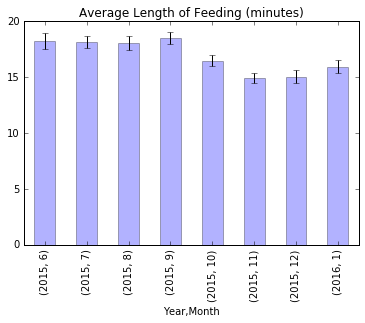

In [147]:
err = monthly_rm15['TotalFeed'].std()/sqrt
monthly_rm15['TotalFeed'].mean().plot(kind='bar',color='b',alpha=0.3,yerr=err)
plt.title('Average Length of Feeding (minutes)')

In [355]:
date = [x.strftime('%Y %m %d') for x in df['time']]

In [356]:
df['Date'] = date

In [357]:
df[:5]

,Unnamed: 0,time,Year,Month,TimeofDay,LeftFeed,RightFeed,BotFeed,TotalFeed,BotAmt,Sleep,Date
0,0,2015-06-21 01:17:09,2015,6,Late night,0.00,1.3,0,1.30,NaN,NaN,2015 06 21
1,1,2015-06-21 02:00:39,2015,6,Late night,7.52,0.0,0,7.52,NaN,NaN,2015 06 21
2,2,2015-06-21 02:37:57,2015,6,Late night,14.50,0.0,0,14.50,NaN,NaN,2015 06 21
3,3,2015-06-21 05:23:55,2015,6,Late night,0.00,20.0,0,20.00,NaN,NaN,2015 06 21
4,4,2015-06-21 05:47:59,2015,6,Late night,22.18,0.0,0,22.18,NaN,NaN,2015 06 21


In [358]:
eat = df[df['TotalFeed'].notnull()]

In [359]:
bydate = eat.groupby(eat['Date'])

In [360]:
bydun = bydate.sum().unstack()

Try a few different fitting and plotting mechanisms here.  First, a polynomial fit, converting dates to numbers and back for plotting.

In [391]:
tots = bydate['TotalFeed'].sum()
errs = bydate['TotalFeed'].std()

In [430]:
x = [datetime.strptime(d,'%Y %m %d').date() for d in bydun['TotalFeed'].index]
xnum = mdates.date2num(x)
xx = np.linspace(xnum.min(), xnum.max(), 100)
dd = mdates.num2date(xx)

In [431]:
z2 = np.polyfit(xnum,bydun['TotalFeed'],2)
p2 = np.poly1d(z2)

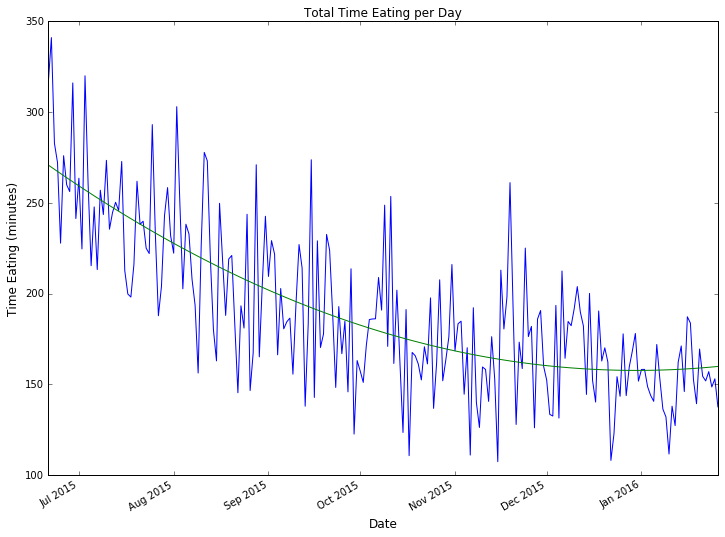

In [432]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

ax.errorbar(xnum,bydun['TotalFeed'])#,yerr=errs, fmt='o') 
plt.plot(dd, p2(xx), '-g') #plot fit

ax.set_title('Total Time Eating per Day')
ax.set_xlabel('Date',fontsize='large')
ax.set_ylabel('Time Eating (minutes)',fontsize='large')
#plt.xlim(datetime(2016,1,1),datetime(2016,2,1))
fig.autofmt_xdate()
plt.show()

Since the data will not curve back upward, this is a non-physical fit.  A power law would be a more physically motivated fit.  Let's do this by converting to log space and performing a least squares fit, then converting back to regular coordinates.

A power law fit is expressed as: 
y = a + x^b.  
In logarithmic space, that becomes:
log(y) = log(a) + b * log(x).

In [433]:
logxnum = np.log10(xnum)
logy = np.log10(tots)
logyerr = errs/tots

In [452]:
linfit = np.polyfit(logxnum,logy,1)
plin = np.poly1d(linfit)
logxx = np.linspace(logxnum.min(), logxnum.max(), 100)

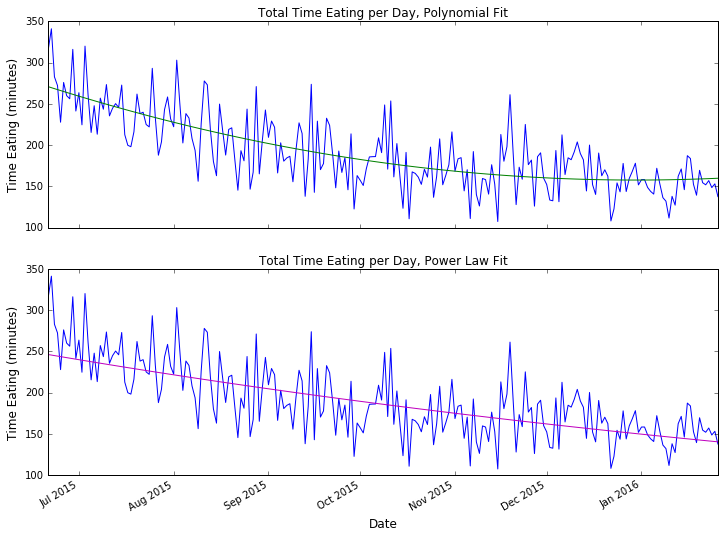

In [467]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(211)

ax.plot(xnum,bydun['TotalFeed'])#plot data
plt.plot(dd, p2(xx), '-g') #plot fit

ax.set_title('Total Time Eating per Day, Polynomial Fit')
ax.set_xlabel('Date',fontsize='large')
ax.set_ylabel('Time Eating (minutes)',fontsize='large')

ax2 = fig.add_subplot(212)
ax2.plot(xnum,bydun['TotalFeed'])#plot data
plt.plot(dd, 10.**logyfit, '-m') #plot fit

ax2.set_title('Total Time Eating per Day, Power Law Fit')
ax2.set_xlabel('Date',fontsize='large')
ax2.set_ylabel('Time Eating (minutes)',fontsize='large')
#plt.xlim(datetime(2016,1,1),datetime(2016,2,1))
fig.autofmt_xdate()

plt.show()

Surprisingly, the power law actually fits worse than the polynomial.  Just to check, I want to see the fit in log space to make sure everything worked correctly.  (Note:  fit parameters are listed highest degree to lowest, so x*fit[0] + fit[1].)

In [468]:
linfit

array([ -1889.58710625,  11088.1112529 ])

In [469]:
logyfit = linfit[0]*logxx + linfit[1]

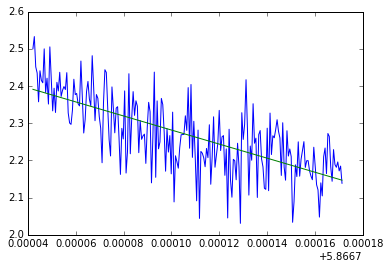

In [470]:
plt.plot(logxnum,logy)
plt.plot(logxx,logyfit)

You can see an inflection point in the data even in log space (around x=0.00011), so the linear fit here isn't that great of a model.  This explains why the power law in linear space didn't fit as well as the polynomial.

In [96]:
daytime = df[df['TotalFeed'].notnull()].groupby("TimeofDay")

In [100]:
eat = df[df['TotalFeed'].notnull()]

In [101]:
data = pd.Series(eat['TimeofDay'])#, index = ['Morning','Afternoon','Evening','Late Night'])

In [111]:
data.value_counts()

Late night    733
Morning       660
Afternoon     613
Evening       554
Name: TimeofDay, dtype: int64

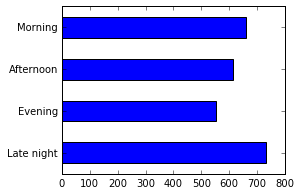

In [121]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.set_xlim([0,800])
data.value_counts().ix[['Late night','Evening','Afternoon','Morning']].plot(kind='barh',ax = ax)

In [ ]:
timelen = pd.cut(df['Total Feed'], 5)

In [ ]:
timelen[:5]

In [ ]:
feedtime = pd.crosstab(df['Time of Day'],timelen)

In [ ]:
feedtime

In [ ]:
feedtime.plot(kind='barh', stacked = True)
plt.legend(loc='best')

In [ ]:
df[:8]

In [ ]:
feeddf = pd.DataFrame({'time':df.time,'leftfeed':df.leftfeed,
                       'rightfeed':df.rightfeed, 'botfeed': bottime,
                       'totfeed':df['Total Feed'], 'month':df.Month,
                       'ToD':df['Time of Day'], 'year':df.Year})

In [ ]:
feeddf = pd.DataFrame(df, columns=['time','Year','Month','Time of Day','leftfeed','rightfeed','Total Feed'])

In [ ]:
feeddf[1010:1020]

In [ ]:
feeddf.insert(6,'botfeed',bottime)

In [ ]:
ordered = feeddf.sort_values('time')

In [ ]:
ordered[1010:1020]

In [ ]:
del feeddf['botfeed']

In [ ]:
df.solid.value_counts()

In [ ]:
df['Bottle Amount'][2000:2012]

In [ ]:
botamt = []
for amt in df['Bottle Amount']:
    if 'oz' not in amt:
        newamt = float('NaN')
    else:
        newamt = amt.strip().replace('oz','')
    botamt.append(newamt)

In [ ]:
df['Sleep time'][3000].split(':')

In [ ]:
df['Sleep time'][3000:3020]

In [ ]:
hms = df['Sleep time']

In [ ]:
    hrlist = []
    for value in hms:
        if str(value) == 'nan':
            hours = float(value)
        elif str(value) ==' ':
            hours = float('Nan')
        else:
            valspl = str(value).split(':')
            if int(valspl[2]) < 10:
                valspl[2] = valspl[2] + '0'
            hours = float(valspl[0]) + float(valspl[1])/60. + float(valspl[2])/60.
        hrlist.append(hours)
    hrarr = np.array(hrlist)


In [ ]:
hms[2557]

In [ ]:
str(hms[2510]) == 'nan'

In [ ]:
if hms[0] == float('NaN'):
    print('yay')